In [1]:
# a. Import required libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# b. Upload / access the dataset (Credit card anomaly dataset recommended)

# Example: Load local creditcard.csv file
data = pd.read_csv("creditcard.csv")

print("Dataset shape:", data.shape)
print(data["Class"].value_counts())

# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Normalize all numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Take only NORMAL data (Class = 0) for training
X_normal = X_scaled[y == 0]

# Split into training and validation sets
X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

print("Training data:", X_train.shape)
print("Validation data:", X_val.shape)

Dataset shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64
Training data: (227452, 30)
Validation data: (56863, 30)


In [3]:
# c. Build Encoder (input → latent representation)

input_dim = X_train.shape[1]     # Number of columns
latent_dim = 16                   # Latent space size

input_layer = Input(shape=(input_dim,))

# Encoder layers
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
latent  = Dense(latent_dim, activation='relu')(encoded)

In [4]:
# d. Build Decoder (latent → reconstruct input)

decoded = Dense(16, activation='relu')(latent)
decoded = Dense(32, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Full Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,598 (14.05 KB)

 Trainable params: 3,598 (14.05 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# e. Compile the model: Optimizer, Loss, and Metrics

autoencoder.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Train the model
history = autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, X_val),
    verbose=1
)

print("\nAutoencoder training complete.")

Epoch 1/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 0.4669 - mae: 0.4645 - val_loss: 0.2993 - val_mae: 0.3699
Epoch 2/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.2377 - mae: 0.3292 - val_loss: 0.1878 - val_mae: 0.2908
Epoch 3/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.1742 - mae: 0.2766 - val_loss: 0.1522 - val_mae: 0.2557
Epoch 4/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 0.1453 - mae: 0.2455 - val_loss: 0.1264 - val_mae: 0.2219
Epoch 5/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.1220 - mae: 0.2148 - val_loss: 0.1160 - val_mae: 0.2153
Epoch 6/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.1081 - mae: 0.1986 - val_loss: 0.1012 - val_mae: 0.1940
Epoch 7/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.1018 - mae: 0.1905 - val_loss: 0.0950 - val_mae: 0.1852
Epoch 8/20
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 0.0972 - mae: 0.1852 - val_loss: 0.0965 - val_mae: 0.1904
Epoch 9/20
3554/3554 ━━━━━━━━━━━

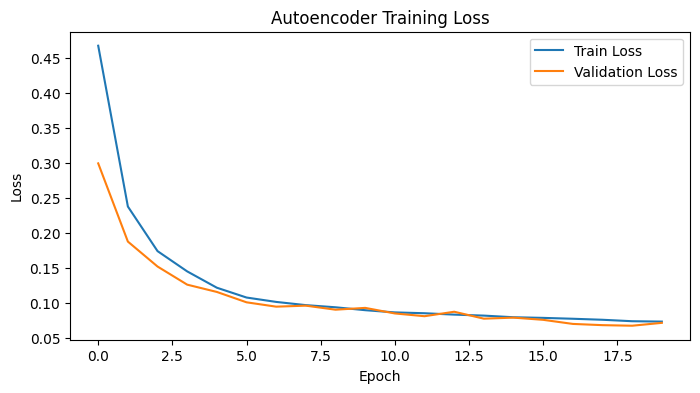

In [7]:
# extra to do  Training Loss Curve

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 9s 972us/step


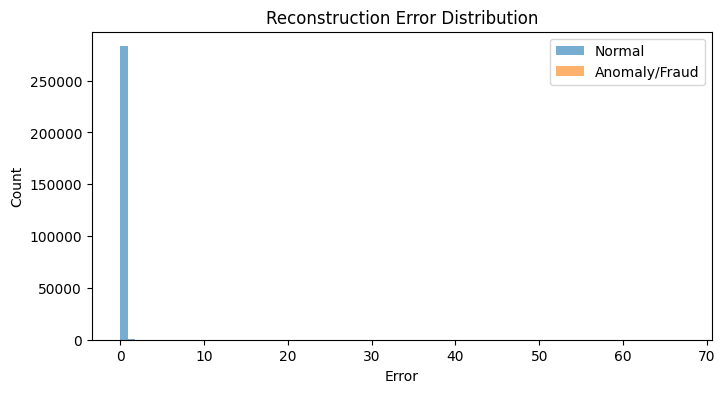

In [9]:
# Reconstruction Error Distribution MOST IMPORTANT

reconstructed = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructed, 2), axis=1)

data["Reconstruction_Error"] = mse

# Plot Reconstruction Error Distribution
normal_errors = data[data["Class"] == 0]["Reconstruction_Error"]
fraud_errors  = data[data["Class"] == 1]["Reconstruction_Error"]

plt.figure(figsize=(8,4))
plt.hist(normal_errors, bins=50, alpha=0.6, label="Normal")
plt.hist(fraud_errors, bins=50, alpha=0.6, label="Anomaly/Fraud")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Count")
plt.legend()
plt.show()